In [2]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

2023-08-24 18:44:59.455006: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 18:44:59.494104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 18:45:00.147517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Notebook run using keras: 2.13.1


In [3]:
inet_model = inc_net.InceptionV3()

2023-08-24 18:45:01.218719: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

1/1 [==============================] - 1s 1s/step
('n02133161', 'American_black_bear', 0.637279)
('n02105056', 'groenendael', 0.031802833)
('n02104365', 'schipperke', 0.029921424)
('n01883070', 'wombat', 0.028507374)
('n01877812', 'wallaby', 0.025098754)


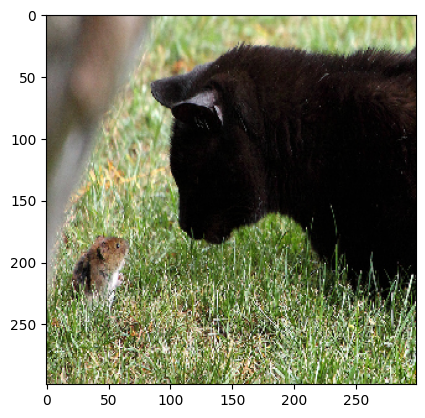

In [5]:
images = transform_img_fn([os.path.join('data','cat_mouse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [6]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

/home/dhshin/anaconda3/envs/lime/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
explainer = lime_image.LimeImageExplainer()

In [41]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

SLIC = SegmentationAlgorithm('slic', n_segments=250, compactness=10, sigma=1)

In [42]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000, segmentation_fn = SLIC)

  0%|                                                                                   | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 147ms/step


  1%|▋                                                                         | 10/1000 [00:00<00:24, 40.99it/s]

1/1 [==============================] - 0s 122ms/step


  2%|█▍                                                                        | 20/1000 [00:00<00:23, 41.82it/s]

1/1 [==============================] - 0s 122ms/step


  3%|██▏                                                                       | 30/1000 [00:00<00:22, 42.51it/s]

1/1 [==============================] - 0s 110ms/step


  4%|██▉                                                                       | 40/1000 [00:00<00:21, 43.77it/s]

1/1 [==============================] - 0s 113ms/step


  5%|███▋                                                                      | 50/1000 [00:01<00:21, 44.26it/s]

1/1 [==============================] - 0s 109ms/step


  6%|████▍                                                                     | 60/1000 [00:01<00:20, 44.95it/s]

1/1 [==============================] - 0s 113ms/step


  7%|█████▏                                                                    | 70/1000 [00:01<00:20, 45.04it/s]

1/1 [==============================] - 0s 110ms/step


  8%|█████▉                                                                    | 80/1000 [00:01<00:20, 45.15it/s]

1/1 [==============================] - 0s 112ms/step


  9%|██████▋                                                                   | 90/1000 [00:02<00:20, 45.30it/s]

1/1 [==============================] - 0s 110ms/step


 10%|███████▎                                                                 | 100/1000 [00:02<00:19, 45.39it/s]

1/1 [==============================] - 0s 109ms/step


 11%|████████                                                                 | 110/1000 [00:02<00:19, 45.60it/s]

1/1 [==============================] - 0s 109ms/step


 12%|████████▊                                                                | 120/1000 [00:02<00:19, 45.64it/s]

1/1 [==============================] - 0s 110ms/step


 13%|█████████▍                                                               | 130/1000 [00:02<00:18, 45.81it/s]

1/1 [==============================] - 0s 110ms/step


 14%|██████████▏                                                              | 140/1000 [00:03<00:18, 45.90it/s]

1/1 [==============================] - 0s 109ms/step


 15%|██████████▉                                                              | 150/1000 [00:03<00:18, 46.03it/s]

1/1 [==============================] - 0s 110ms/step


 16%|███████████▋                                                             | 160/1000 [00:03<00:18, 45.91it/s]

1/1 [==============================] - 0s 112ms/step


 17%|████████████▍                                                            | 170/1000 [00:03<00:18, 45.86it/s]

1/1 [==============================] - 0s 122ms/step


 18%|█████████████▏                                                           | 180/1000 [00:03<00:18, 45.13it/s]

1/1 [==============================] - 0s 108ms/step


 19%|█████████████▊                                                           | 190/1000 [00:04<00:17, 45.39it/s]

1/1 [==============================] - 0s 109ms/step


 20%|██████████████▌                                                          | 200/1000 [00:04<00:17, 45.56it/s]

1/1 [==============================] - 0s 110ms/step


 21%|███████████████▎                                                         | 210/1000 [00:04<00:17, 45.82it/s]

1/1 [==============================] - 0s 109ms/step


 22%|████████████████                                                         | 220/1000 [00:04<00:17, 45.65it/s]

1/1 [==============================] - 0s 109ms/step


 23%|████████████████▊                                                        | 230/1000 [00:05<00:16, 45.75it/s]

1/1 [==============================] - 0s 114ms/step


 24%|█████████████████▌                                                       | 240/1000 [00:05<00:16, 45.70it/s]

1/1 [==============================] - 0s 109ms/step


 25%|██████████████████▎                                                      | 250/1000 [00:05<00:16, 46.12it/s]

1/1 [==============================] - 0s 108ms/step


 26%|██████████████████▉                                                      | 260/1000 [00:05<00:16, 45.87it/s]

1/1 [==============================] - 0s 107ms/step


 27%|███████████████████▋                                                     | 270/1000 [00:05<00:15, 46.19it/s]

1/1 [==============================] - 0s 109ms/step


 28%|████████████████████▍                                                    | 280/1000 [00:06<00:15, 46.27it/s]

1/1 [==============================] - 0s 107ms/step


 29%|█████████████████████▏                                                   | 290/1000 [00:06<00:15, 46.20it/s]

1/1 [==============================] - 0s 108ms/step


 30%|█████████████████████▉                                                   | 300/1000 [00:06<00:15, 46.47it/s]

1/1 [==============================] - 0s 109ms/step


 31%|██████████████████████▋                                                  | 310/1000 [00:06<00:14, 46.60it/s]

1/1 [==============================] - 0s 107ms/step


 32%|███████████████████████▎                                                 | 320/1000 [00:07<00:14, 46.71it/s]

1/1 [==============================] - 0s 109ms/step


 33%|████████████████████████                                                 | 330/1000 [00:07<00:14, 46.61it/s]

1/1 [==============================] - 0s 110ms/step


 34%|████████████████████████▊                                                | 340/1000 [00:07<00:14, 46.42it/s]

1/1 [==============================] - 0s 111ms/step


 35%|█████████████████████████▌                                               | 350/1000 [00:07<00:13, 46.47it/s]

1/1 [==============================] - 0s 108ms/step


 36%|██████████████████████████▎                                              | 360/1000 [00:07<00:13, 46.48it/s]

1/1 [==============================] - 0s 116ms/step


 37%|███████████████████████████                                              | 370/1000 [00:08<00:13, 46.02it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███████████████████████████▋                                             | 380/1000 [00:08<00:13, 45.83it/s]

1/1 [==============================] - 0s 108ms/step


 39%|████████████████████████████▍                                            | 390/1000 [00:08<00:13, 46.12it/s]

1/1 [==============================] - 0s 108ms/step


 40%|█████████████████████████████▏                                           | 400/1000 [00:08<00:12, 46.41it/s]

1/1 [==============================] - 0s 108ms/step


 41%|█████████████████████████████▉                                           | 410/1000 [00:08<00:12, 46.33it/s]

1/1 [==============================] - 0s 107ms/step


 42%|██████████████████████████████▋                                          | 420/1000 [00:09<00:12, 46.26it/s]

1/1 [==============================] - 0s 111ms/step


 43%|███████████████████████████████▍                                         | 430/1000 [00:09<00:12, 46.25it/s]

1/1 [==============================] - 0s 108ms/step


 44%|████████████████████████████████                                         | 440/1000 [00:09<00:12, 46.33it/s]

1/1 [==============================] - 0s 108ms/step


 45%|████████████████████████████████▊                                        | 450/1000 [00:09<00:11, 46.28it/s]

1/1 [==============================] - 0s 108ms/step


 46%|█████████████████████████████████▌                                       | 460/1000 [00:10<00:11, 46.44it/s]

1/1 [==============================] - 0s 110ms/step


 47%|██████████████████████████████████▎                                      | 470/1000 [00:10<00:11, 46.49it/s]

1/1 [==============================] - 0s 120ms/step


 48%|███████████████████████████████████                                      | 480/1000 [00:10<00:11, 45.68it/s]

1/1 [==============================] - 0s 110ms/step


 49%|███████████████████████████████████▊                                     | 490/1000 [00:10<00:11, 45.87it/s]

1/1 [==============================] - 0s 108ms/step


 50%|████████████████████████████████████▌                                    | 500/1000 [00:10<00:10, 45.92it/s]

1/1 [==============================] - 0s 108ms/step


 51%|█████████████████████████████████████▏                                   | 510/1000 [00:11<00:10, 46.23it/s]

1/1 [==============================] - 0s 109ms/step


 52%|█████████████████████████████████████▉                                   | 520/1000 [00:11<00:10, 46.49it/s]

1/1 [==============================] - 0s 110ms/step


 53%|██████████████████████████████████████▋                                  | 530/1000 [00:11<00:10, 46.56it/s]

1/1 [==============================] - 0s 109ms/step


 54%|███████████████████████████████████████▍                                 | 540/1000 [00:11<00:09, 46.38it/s]

1/1 [==============================] - 0s 110ms/step


 55%|████████████████████████████████████████▏                                | 550/1000 [00:11<00:09, 46.48it/s]

1/1 [==============================] - 0s 107ms/step


 56%|████████████████████████████████████████▉                                | 560/1000 [00:12<00:09, 46.51it/s]

1/1 [==============================] - 0s 109ms/step


 57%|█████████████████████████████████████████▌                               | 570/1000 [00:12<00:09, 46.38it/s]

1/1 [==============================] - 0s 107ms/step


 58%|██████████████████████████████████████████▎                              | 580/1000 [00:12<00:09, 46.25it/s]

1/1 [==============================] - 0s 110ms/step


 59%|███████████████████████████████████████████                              | 590/1000 [00:12<00:08, 46.30it/s]

1/1 [==============================] - 0s 110ms/step


 60%|███████████████████████████████████████████▊                             | 600/1000 [00:13<00:08, 46.35it/s]

1/1 [==============================] - 0s 111ms/step


 61%|████████████████████████████████████████████▌                            | 610/1000 [00:13<00:08, 46.41it/s]

1/1 [==============================] - 0s 109ms/step


 62%|█████████████████████████████████████████████▎                           | 620/1000 [00:13<00:08, 46.47it/s]

1/1 [==============================] - 0s 109ms/step


 63%|█████████████████████████████████████████████▉                           | 630/1000 [00:13<00:07, 46.57it/s]

1/1 [==============================] - 0s 111ms/step


 64%|██████████████████████████████████████████████▋                          | 640/1000 [00:13<00:07, 46.34it/s]

1/1 [==============================] - 0s 109ms/step


 65%|███████████████████████████████████████████████▍                         | 650/1000 [00:14<00:07, 46.67it/s]

1/1 [==============================] - 0s 108ms/step


 66%|████████████████████████████████████████████████▏                        | 660/1000 [00:14<00:07, 46.14it/s]

1/1 [==============================] - 0s 111ms/step


 67%|████████████████████████████████████████████████▉                        | 670/1000 [00:14<00:07, 46.02it/s]

1/1 [==============================] - 0s 108ms/step


 68%|█████████████████████████████████████████████████▋                       | 680/1000 [00:14<00:06, 46.16it/s]

1/1 [==============================] - 0s 108ms/step


 69%|██████████████████████████████████████████████████▎                      | 690/1000 [00:15<00:06, 46.50it/s]

1/1 [==============================] - 0s 110ms/step


 70%|███████████████████████████████████████████████████                      | 700/1000 [00:15<00:06, 46.51it/s]

1/1 [==============================] - 0s 108ms/step


 71%|███████████████████████████████████████████████████▊                     | 710/1000 [00:15<00:06, 46.65it/s]

1/1 [==============================] - 0s 109ms/step


 72%|████████████████████████████████████████████████████▌                    | 720/1000 [00:15<00:06, 46.63it/s]

1/1 [==============================] - 0s 110ms/step


 73%|█████████████████████████████████████████████████████▎                   | 730/1000 [00:15<00:05, 46.67it/s]

1/1 [==============================] - 0s 111ms/step


 74%|██████████████████████████████████████████████████████                   | 740/1000 [00:16<00:05, 46.02it/s]

1/1 [==============================] - 0s 110ms/step


 75%|██████████████████████████████████████████████████████▊                  | 750/1000 [00:16<00:05, 46.27it/s]

1/1 [==============================] - 0s 108ms/step


 76%|███████████████████████████████████████████████████████▍                 | 760/1000 [00:16<00:05, 46.42it/s]

1/1 [==============================] - 0s 109ms/step


 77%|████████████████████████████████████████████████████████▏                | 770/1000 [00:16<00:04, 46.58it/s]

1/1 [==============================] - 0s 108ms/step


 78%|████████████████████████████████████████████████████████▉                | 780/1000 [00:16<00:04, 46.68it/s]

1/1 [==============================] - 0s 110ms/step


 79%|█████████████████████████████████████████████████████████▋               | 790/1000 [00:17<00:04, 46.50it/s]

1/1 [==============================] - 0s 107ms/step


 80%|██████████████████████████████████████████████████████████▍              | 800/1000 [00:17<00:04, 46.53it/s]

1/1 [==============================] - 0s 105ms/step


 81%|███████████████████████████████████████████████████████████▏             | 810/1000 [00:17<00:04, 46.96it/s]

1/1 [==============================] - 0s 107ms/step


 82%|███████████████████████████████████████████████████████████▊             | 820/1000 [00:17<00:03, 46.70it/s]

1/1 [==============================] - 0s 109ms/step


 83%|████████████████████████████████████████████████████████████▌            | 830/1000 [00:18<00:03, 46.94it/s]

1/1 [==============================] - 0s 112ms/step


 84%|█████████████████████████████████████████████████████████████▎           | 840/1000 [00:18<00:03, 46.50it/s]

1/1 [==============================] - 0s 112ms/step


 85%|██████████████████████████████████████████████████████████████           | 850/1000 [00:18<00:03, 46.18it/s]

1/1 [==============================] - 0s 112ms/step


 86%|██████████████████████████████████████████████████████████████▊          | 860/1000 [00:18<00:03, 45.99it/s]

1/1 [==============================] - 0s 109ms/step


 87%|███████████████████████████████████████████████████████████████▌         | 870/1000 [00:18<00:02, 46.03it/s]

1/1 [==============================] - 0s 107ms/step


 88%|████████████████████████████████████████████████████████████████▏        | 880/1000 [00:19<00:02, 46.37it/s]

1/1 [==============================] - 0s 117ms/step


 89%|████████████████████████████████████████████████████████████████▉        | 890/1000 [00:19<00:02, 45.85it/s]

1/1 [==============================] - 0s 109ms/step


 90%|█████████████████████████████████████████████████████████████████▋       | 900/1000 [00:19<00:02, 45.75it/s]

1/1 [==============================] - 0s 108ms/step


 91%|██████████████████████████████████████████████████████████████████▍      | 910/1000 [00:19<00:01, 46.10it/s]

1/1 [==============================] - 0s 107ms/step


 92%|███████████████████████████████████████████████████████████████████▏     | 920/1000 [00:19<00:01, 46.38it/s]

1/1 [==============================] - 0s 107ms/step


 93%|███████████████████████████████████████████████████████████████████▉     | 930/1000 [00:20<00:01, 46.70it/s]

1/1 [==============================] - 0s 108ms/step


 94%|████████████████████████████████████████████████████████████████████▌    | 940/1000 [00:20<00:01, 46.74it/s]

1/1 [==============================] - 0s 109ms/step


 95%|█████████████████████████████████████████████████████████████████████▎   | 950/1000 [00:20<00:01, 46.84it/s]

1/1 [==============================] - 0s 108ms/step


 96%|██████████████████████████████████████████████████████████████████████   | 960/1000 [00:20<00:00, 46.78it/s]

1/1 [==============================] - 0s 115ms/step


 97%|██████████████████████████████████████████████████████████████████████▊  | 970/1000 [00:21<00:00, 46.48it/s]

1/1 [==============================] - 0s 112ms/step


 98%|███████████████████████████████████████████████████████████████████████▌ | 980/1000 [00:21<00:00, 45.89it/s]

1/1 [==============================] - 0s 111ms/step


 99%|████████████████████████████████████████████████████████████████████████▎| 990/1000 [00:21<00:00, 45.84it/s]

1/1 [==============================] - 0s 119ms/step


100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.06it/s]

CPU times: user 7min 39s, sys: 24.6 s, total: 8min 3s
Wall time: 21.9 s


In [43]:
from skimage.segmentation import mark_boundaries

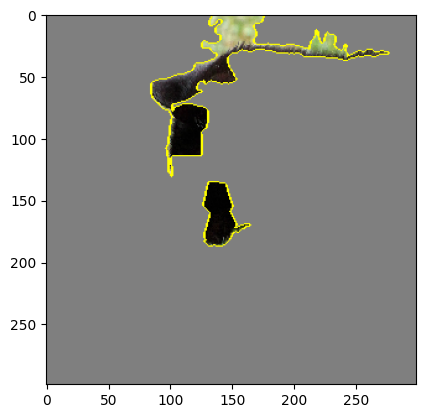

In [48]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

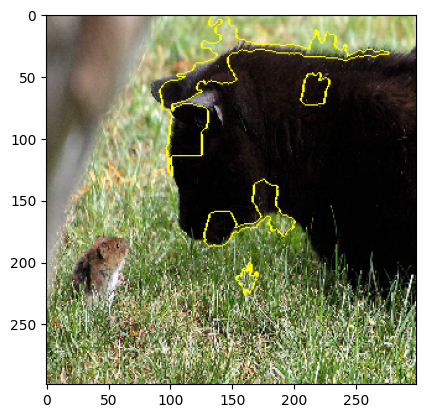

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

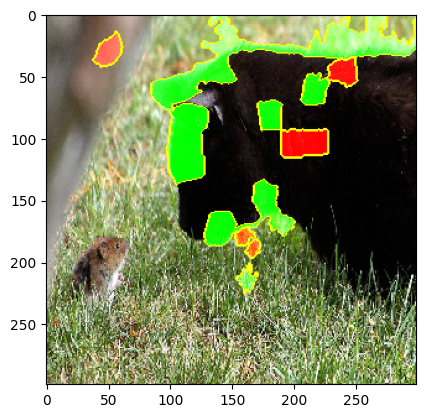

In [21]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=20, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

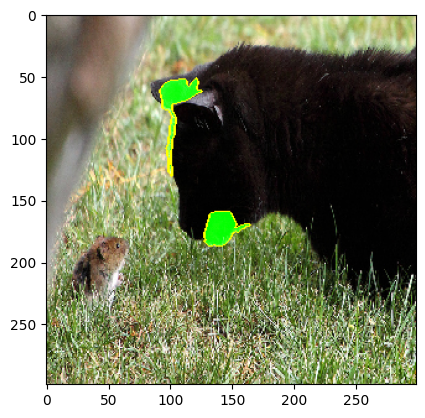

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

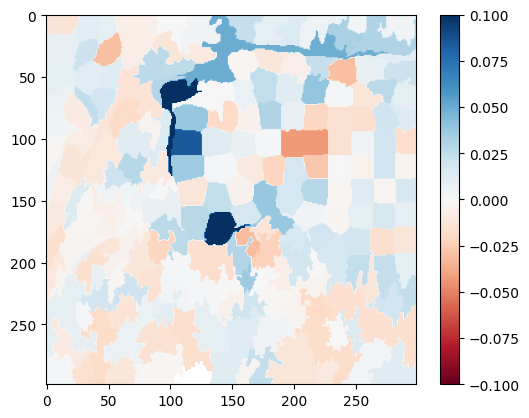

In [24]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

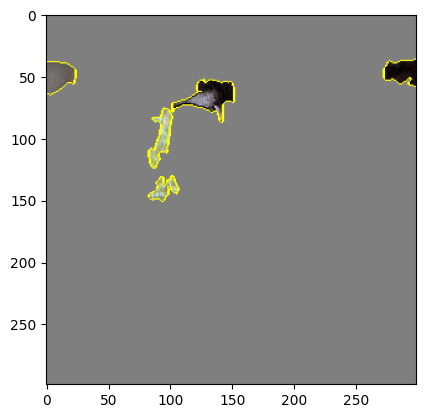

In [25]:
temp, mask = explanation.get_image_and_mask(106, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

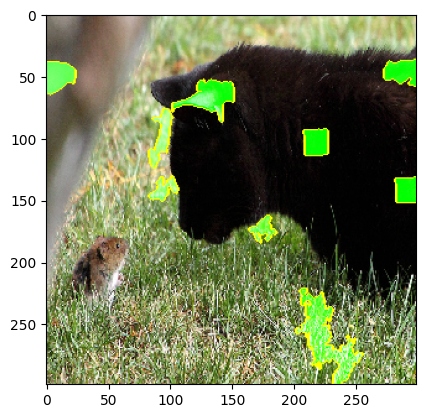

In [26]:
temp, mask = explanation.get_image_and_mask(106, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


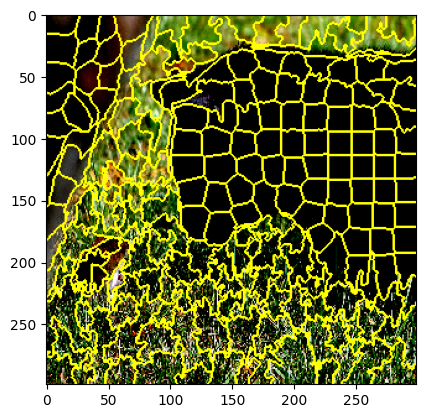

In [27]:
plt.imshow(mark_boundaries(images[0], explanation.segments))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


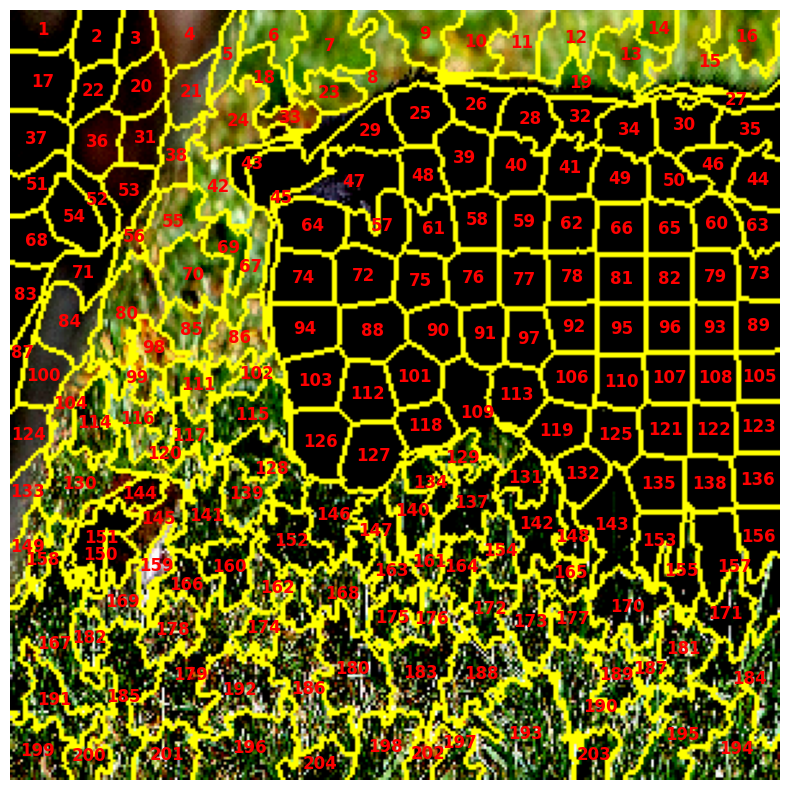

In [28]:
from scipy.ndimage import center_of_mass

segments = explanation.segments

boundary_marked_image = mark_boundaries(images[0], segments)

plt.figure(figsize=(10,10))
plt.imshow(boundary_marked_image)

unique_segments = np.unique(segments)
for seg_id in unique_segments:
    y, x = center_of_mass(segments == seg_id)
    plt.text(x, y, str(seg_id), color='red', fontsize=12, ha='center', va='center', weight='bold')

plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


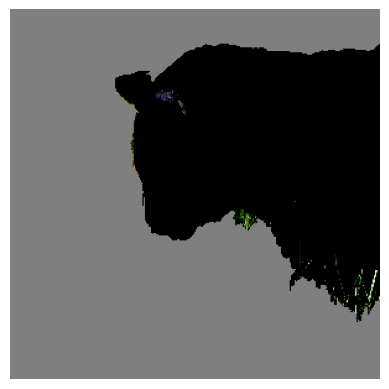

In [34]:
segments = explanation.segments

desired_superpixels = [25, 26, 27, 28, 29, 30, 35, 43, 45, 47,48, 39, 40, 41, 49, 50, 46, 44, 64, 57, 61, 58, 59, 62, 66, 65, 60, 63, 74, 72, 75, 76, 77, 78, 81, 82, 79, 73, 94, 88, 91, 97, 92, 95, 96, 93, 103, 112, 101, 126, 127, 118, 109, 113, 106, 110, 107, 108, 105, 119, 125, 121, 122, 123, 132, 135, 138, 136, 143, 153, 155, 156, 157, 171, 32, 34, 30, 90, 89]

masked_image = np.ones(images[0].shape) * 0.5
for sp_id in desired_superpixels:
    masked_image[segments == sp_id] = images[0][segments == sp_id]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [35]:
masked_image = masked_image.reshape((1, 299, 299, 3))

prediction = inet_model(masked_image)

# print(prediction)

In [36]:
predicted_class = np.argmax(prediction[0])
predicted_prob = prediction[0][predicted_class]
print(f"Predicted Class ID: {predicted_class}, Probability: {predicted_prob:.2%}")

Predicted Class ID: 295, Probability: 60.89%


In [37]:
import json
import requests

# ImageNet의 라벨 정보를 가져옵니다.
imagenet_classes_url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(imagenet_classes_url)
imagenet_classes = json.loads(response.text)

# 클래스 ID 380에 해당하는 라벨을 출력합니다.
label = imagenet_classes[str(predicted_class)][1]
print(f"Class ID {predicted_class} corresponds to: {label}")

Class ID 295 corresponds to: American_black_bear


In [38]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

felzenszwalb = SegmentationAlgorithm('felzenszwalb', scale=100, sigma=0.5, min_size=50)

In [39]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000, segmentation_fn = felzenszwalb)

  0%|                                                                                   | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 133ms/step


  1%|▋                                                                         | 10/1000 [00:00<00:25, 39.27it/s]

1/1 [==============================] - 0s 110ms/step


  2%|█▍                                                                        | 20/1000 [00:00<00:24, 39.63it/s]

1/1 [==============================] - 0s 115ms/step


  3%|██▏                                                                       | 30/1000 [00:00<00:24, 39.73it/s]

1/1 [==============================] - 0s 117ms/step


  4%|██▉                                                                       | 40/1000 [00:01<00:24, 39.58it/s]

1/1 [==============================] - 0s 119ms/step


  5%|███▋                                                                      | 50/1000 [00:01<00:24, 39.44it/s]

1/1 [==============================] - 0s 111ms/step


  6%|████▍                                                                     | 60/1000 [00:01<00:23, 39.68it/s]

1/1 [==============================] - 0s 122ms/step


  7%|█████▏                                                                    | 70/1000 [00:01<00:23, 39.45it/s]

1/1 [==============================] - 0s 118ms/step


  8%|█████▉                                                                    | 80/1000 [00:02<00:23, 39.26it/s]

1/1 [==============================] - 0s 111ms/step


  9%|██████▋                                                                   | 90/1000 [00:02<00:22, 39.59it/s]

1/1 [==============================] - 0s 112ms/step


 10%|███████▎                                                                 | 100/1000 [00:02<00:22, 39.46it/s]

1/1 [==============================] - 0s 112ms/step


 11%|████████                                                                 | 110/1000 [00:02<00:22, 39.53it/s]

1/1 [==============================] - 0s 121ms/step


 12%|████████▊                                                                | 120/1000 [00:03<00:22, 39.41it/s]

1/1 [==============================] - 0s 135ms/step


 13%|█████████▍                                                               | 130/1000 [00:03<00:22, 38.59it/s]

1/1 [==============================] - 0s 115ms/step


 14%|██████████▏                                                              | 140/1000 [00:03<00:22, 38.96it/s]

1/1 [==============================] - 0s 123ms/step


 15%|██████████▉                                                              | 150/1000 [00:03<00:21, 38.77it/s]

1/1 [==============================] - 0s 114ms/step


 16%|███████████▋                                                             | 160/1000 [00:04<00:21, 38.94it/s]

1/1 [==============================] - 0s 111ms/step


 17%|████████████▍                                                            | 170/1000 [00:04<00:21, 39.33it/s]

1/1 [==============================] - 0s 118ms/step


 18%|█████████████▏                                                           | 180/1000 [00:04<00:20, 39.19it/s]

1/1 [==============================] - 0s 117ms/step


 19%|█████████████▊                                                           | 190/1000 [00:04<00:20, 39.29it/s]

1/1 [==============================] - 0s 110ms/step


 20%|██████████████▌                                                          | 200/1000 [00:05<00:20, 39.65it/s]

1/1 [==============================] - 0s 121ms/step


 21%|███████████████▎                                                         | 210/1000 [00:05<00:19, 39.51it/s]

1/1 [==============================] - 0s 127ms/step


 22%|████████████████                                                         | 220/1000 [00:05<00:19, 39.68it/s]

1/1 [==============================] - 0s 116ms/step


 23%|████████████████▊                                                        | 230/1000 [00:05<00:19, 40.06it/s]

1/1 [==============================] - 0s 109ms/step


 24%|█████████████████▌                                                       | 240/1000 [00:06<00:18, 41.11it/s]

1/1 [==============================] - 0s 120ms/step


 25%|██████████████████▎                                                      | 250/1000 [00:06<00:18, 40.91it/s]

1/1 [==============================] - 0s 162ms/step


 26%|██████████████████▉                                                      | 260/1000 [00:06<00:19, 38.45it/s]

1/1 [==============================] - 0s 110ms/step


 27%|███████████████████▋                                                     | 270/1000 [00:06<00:18, 39.63it/s]

1/1 [==============================] - 0s 112ms/step


 28%|████████████████████▍                                                    | 280/1000 [00:07<00:17, 40.30it/s]

1/1 [==============================] - 0s 115ms/step


 29%|█████████████████████▏                                                   | 290/1000 [00:07<00:17, 40.63it/s]

1/1 [==============================] - 0s 110ms/step


 30%|█████████████████████▉                                                   | 300/1000 [00:07<00:17, 41.02it/s]

1/1 [==============================] - 0s 119ms/step


 31%|██████████████████████▋                                                  | 310/1000 [00:07<00:16, 41.10it/s]

1/1 [==============================] - 0s 111ms/step


 32%|███████████████████████▎                                                 | 320/1000 [00:08<00:16, 41.27it/s]

1/1 [==============================] - 0s 113ms/step


 33%|████████████████████████                                                 | 330/1000 [00:08<00:16, 41.52it/s]

1/1 [==============================] - 0s 115ms/step


 34%|████████████████████████▊                                                | 340/1000 [00:08<00:15, 41.43it/s]

1/1 [==============================] - 0s 121ms/step


 35%|█████████████████████████▌                                               | 350/1000 [00:08<00:15, 40.86it/s]

1/1 [==============================] - 0s 112ms/step


 36%|██████████████████████████▎                                              | 360/1000 [00:09<00:15, 41.22it/s]

1/1 [==============================] - 0s 110ms/step


 37%|███████████████████████████                                              | 370/1000 [00:09<00:15, 41.84it/s]

1/1 [==============================] - 0s 109ms/step


 38%|███████████████████████████▋                                             | 380/1000 [00:09<00:14, 42.04it/s]

1/1 [==============================] - 0s 112ms/step


 39%|████████████████████████████▍                                            | 390/1000 [00:09<00:14, 42.32it/s]

1/1 [==============================] - 0s 113ms/step


 40%|█████████████████████████████▏                                           | 400/1000 [00:09<00:14, 42.41it/s]

1/1 [==============================] - 0s 109ms/step


 41%|█████████████████████████████▉                                           | 410/1000 [00:10<00:13, 42.41it/s]

1/1 [==============================] - 0s 110ms/step


 42%|██████████████████████████████▋                                          | 420/1000 [00:10<00:13, 42.56it/s]

1/1 [==============================] - 0s 110ms/step


 43%|███████████████████████████████▍                                         | 430/1000 [00:10<00:13, 42.76it/s]

1/1 [==============================] - 0s 111ms/step


 44%|████████████████████████████████                                         | 440/1000 [00:10<00:13, 42.58it/s]

1/1 [==============================] - 0s 110ms/step


 45%|████████████████████████████████▊                                        | 450/1000 [00:11<00:12, 42.58it/s]

1/1 [==============================] - 0s 109ms/step


 46%|█████████████████████████████████▌                                       | 460/1000 [00:11<00:12, 42.74it/s]

1/1 [==============================] - 0s 111ms/step


 47%|██████████████████████████████████▎                                      | 470/1000 [00:11<00:12, 42.72it/s]

1/1 [==============================] - 0s 110ms/step


 48%|███████████████████████████████████                                      | 480/1000 [00:11<00:12, 43.15it/s]

1/1 [==============================] - 0s 109ms/step


 49%|███████████████████████████████████▊                                     | 490/1000 [00:12<00:11, 43.25it/s]

1/1 [==============================] - 0s 108ms/step


 50%|████████████████████████████████████▌                                    | 500/1000 [00:12<00:11, 42.96it/s]

1/1 [==============================] - 0s 109ms/step


 51%|█████████████████████████████████████▏                                   | 510/1000 [00:12<00:11, 42.62it/s]

1/1 [==============================] - 0s 110ms/step


 52%|█████████████████████████████████████▉                                   | 520/1000 [00:12<00:11, 42.66it/s]

1/1 [==============================] - 0s 112ms/step


 53%|██████████████████████████████████████▋                                  | 530/1000 [00:12<00:11, 42.22it/s]

1/1 [==============================] - 0s 109ms/step


 54%|███████████████████████████████████████▍                                 | 540/1000 [00:13<00:10, 42.57it/s]

1/1 [==============================] - 0s 108ms/step


 55%|████████████████████████████████████████▏                                | 550/1000 [00:13<00:10, 42.91it/s]

1/1 [==============================] - 0s 109ms/step


 56%|████████████████████████████████████████▉                                | 560/1000 [00:13<00:10, 43.03it/s]

1/1 [==============================] - 0s 108ms/step


 57%|█████████████████████████████████████████▌                               | 570/1000 [00:13<00:09, 43.23it/s]

1/1 [==============================] - 0s 110ms/step


 58%|██████████████████████████████████████████▎                              | 580/1000 [00:14<00:09, 42.89it/s]

1/1 [==============================] - 0s 118ms/step


 59%|███████████████████████████████████████████                              | 590/1000 [00:14<00:09, 42.13it/s]

1/1 [==============================] - 0s 110ms/step


 60%|███████████████████████████████████████████▊                             | 600/1000 [00:14<00:09, 42.39it/s]

1/1 [==============================] - 0s 109ms/step


 61%|████████████████████████████████████████████▌                            | 610/1000 [00:14<00:09, 42.56it/s]

1/1 [==============================] - 0s 109ms/step


 62%|█████████████████████████████████████████████▎                           | 620/1000 [00:15<00:08, 42.66it/s]

1/1 [==============================] - 0s 112ms/step


 63%|█████████████████████████████████████████████▉                           | 630/1000 [00:15<00:08, 42.77it/s]

1/1 [==============================] - 0s 110ms/step


 64%|██████████████████████████████████████████████▋                          | 640/1000 [00:15<00:08, 42.90it/s]

1/1 [==============================] - 0s 112ms/step


 65%|███████████████████████████████████████████████▍                         | 650/1000 [00:15<00:08, 42.78it/s]

1/1 [==============================] - 0s 112ms/step


 66%|████████████████████████████████████████████████▏                        | 660/1000 [00:16<00:07, 42.59it/s]

1/1 [==============================] - 0s 109ms/step


 67%|████████████████████████████████████████████████▉                        | 670/1000 [00:16<00:07, 42.91it/s]

1/1 [==============================] - 0s 109ms/step


 68%|█████████████████████████████████████████████████▋                       | 680/1000 [00:16<00:07, 43.02it/s]

1/1 [==============================] - 0s 109ms/step


 69%|██████████████████████████████████████████████████▎                      | 690/1000 [00:16<00:07, 42.98it/s]

1/1 [==============================] - 0s 110ms/step


 70%|███████████████████████████████████████████████████                      | 700/1000 [00:16<00:06, 42.96it/s]

1/1 [==============================] - 0s 109ms/step


 71%|███████████████████████████████████████████████████▊                     | 710/1000 [00:17<00:06, 43.15it/s]

1/1 [==============================] - 0s 110ms/step


 72%|████████████████████████████████████████████████████▌                    | 720/1000 [00:17<00:06, 43.05it/s]

1/1 [==============================] - 0s 108ms/step


 73%|█████████████████████████████████████████████████████▎                   | 730/1000 [00:17<00:06, 43.13it/s]

1/1 [==============================] - 0s 109ms/step


 74%|██████████████████████████████████████████████████████                   | 740/1000 [00:17<00:06, 42.90it/s]

1/1 [==============================] - 0s 111ms/step


 75%|██████████████████████████████████████████████████████▊                  | 750/1000 [00:18<00:05, 42.96it/s]

1/1 [==============================] - 0s 107ms/step


 76%|███████████████████████████████████████████████████████▍                 | 760/1000 [00:18<00:05, 43.04it/s]

1/1 [==============================] - 0s 108ms/step


 77%|████████████████████████████████████████████████████████▏                | 770/1000 [00:18<00:05, 43.31it/s]

1/1 [==============================] - 0s 107ms/step


 78%|████████████████████████████████████████████████████████▉                | 780/1000 [00:18<00:05, 43.39it/s]

1/1 [==============================] - 0s 111ms/step


 79%|█████████████████████████████████████████████████████████▋               | 790/1000 [00:19<00:04, 43.38it/s]

1/1 [==============================] - 0s 107ms/step


 80%|██████████████████████████████████████████████████████████▍              | 800/1000 [00:19<00:04, 43.63it/s]

1/1 [==============================] - 0s 107ms/step


 81%|███████████████████████████████████████████████████████████▏             | 810/1000 [00:19<00:04, 43.93it/s]

1/1 [==============================] - 0s 108ms/step


 82%|███████████████████████████████████████████████████████████▊             | 820/1000 [00:19<00:04, 43.70it/s]

1/1 [==============================] - 0s 107ms/step


 83%|████████████████████████████████████████████████████████████▌            | 830/1000 [00:19<00:03, 43.79it/s]

1/1 [==============================] - 0s 109ms/step


 84%|█████████████████████████████████████████████████████████████▎           | 840/1000 [00:20<00:03, 43.77it/s]

1/1 [==============================] - 0s 110ms/step


 85%|██████████████████████████████████████████████████████████████           | 850/1000 [00:20<00:03, 43.41it/s]

1/1 [==============================] - 0s 109ms/step


 86%|██████████████████████████████████████████████████████████████▊          | 860/1000 [00:20<00:03, 43.38it/s]

1/1 [==============================] - 0s 108ms/step


 87%|███████████████████████████████████████████████████████████████▌         | 870/1000 [00:20<00:02, 43.42it/s]

1/1 [==============================] - 0s 107ms/step


 88%|████████████████████████████████████████████████████████████████▏        | 880/1000 [00:21<00:02, 43.56it/s]

1/1 [==============================] - 0s 108ms/step


 89%|████████████████████████████████████████████████████████████████▉        | 890/1000 [00:21<00:02, 43.63it/s]

1/1 [==============================] - 0s 108ms/step


 90%|█████████████████████████████████████████████████████████████████▋       | 900/1000 [00:21<00:02, 43.23it/s]

1/1 [==============================] - 0s 110ms/step


 91%|██████████████████████████████████████████████████████████████████▍      | 910/1000 [00:21<00:02, 42.94it/s]

1/1 [==============================] - 0s 110ms/step


 92%|███████████████████████████████████████████████████████████████████▏     | 920/1000 [00:22<00:01, 42.70it/s]

1/1 [==============================] - 0s 109ms/step


 93%|███████████████████████████████████████████████████████████████████▉     | 930/1000 [00:22<00:01, 42.76it/s]

1/1 [==============================] - 0s 110ms/step


 94%|████████████████████████████████████████████████████████████████████▌    | 940/1000 [00:22<00:01, 42.87it/s]

1/1 [==============================] - 0s 110ms/step


 95%|█████████████████████████████████████████████████████████████████████▎   | 950/1000 [00:22<00:01, 43.08it/s]

1/1 [==============================] - 0s 111ms/step


 96%|██████████████████████████████████████████████████████████████████████   | 960/1000 [00:22<00:00, 43.07it/s]

1/1 [==============================] - 0s 108ms/step


 97%|██████████████████████████████████████████████████████████████████████▊  | 970/1000 [00:23<00:00, 43.25it/s]

1/1 [==============================] - 0s 109ms/step


 98%|███████████████████████████████████████████████████████████████████████▌ | 980/1000 [00:23<00:00, 42.92it/s]

1/1 [==============================] - 0s 109ms/step


 99%|████████████████████████████████████████████████████████████████████████▎| 990/1000 [00:23<00:00, 43.18it/s]

1/1 [==============================] - 0s 108ms/step


100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 41.87it/s]

CPU times: user 7min 38s, sys: 35.6 s, total: 8min 14s
Wall time: 24.1 s
